# Urban Sound Classification
## Data Description
The dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: - 
- Air Conditioner 
- Car Horn 
- Children Playing 
- Dog bark 
- Drilling 
- Engine Idling 
- Gun Shot 
- Jackhammer 
- Siren Street 
- Music 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob

print(os.listdir("urban-sound-classification"))

# Any results you write to the current directory are saved as output.

['img', 'test.csv', 'train.csv', 'train', 'test']


In [2]:
df_train = pd.read_csv('urban-sound-classification/train.csv')
df_test = pd.read_csv('urban-sound-classification/test.csv')

print('Train Size: ', df_train.shape)
print('Test Size: ', df_test.shape)

Train Size:  (5435, 2)
Test Size:  (3297, 1)


In [3]:
LABELS = df_train.Class.unique()

In [5]:
df_train.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [22]:
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
plt.style.use('seaborn-white')
%config InlineBackend.figure_format = 'retina'

In [255]:
X = np.load('train.npy') 
y_hot = np.load('train_labels.npy')

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size= 0.25, random_state=True, shuffle=True)

In [257]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [258]:
X_eval = np.load('test.npy') 

In [259]:
X_eval = preprocessing.scale(X_eval)

In [260]:
# some model parameters
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 256
nb_epoch = 50

In [262]:
def plot_graph():
    print(history.history.keys())
    plt.figure(1)
    # summarize history for accuracy
    plt.subplot(211)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.tight_layout()
    plt.show()

In [263]:
# start building a model
import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation, BatchNormalization, Dropout
import warnings
warnings.filterwarnings("ignore")
model1 = Sequential()

model1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer = keras.initializers.he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(256, activation='relu', kernel_initializer= keras.initializers.he_normal(seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Dense(output_dim, activation='softmax'))

In [264]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               99328     
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                2570      
Total para

In [265]:
# initialize the optimizer and model
print("Compiling model...")
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Compiling model...


In [266]:
history = model1.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 4076 samples, validate on 1359 samples
Epoch 1/50
4076/4076 [==============================] - 1s 362us/step - loss: 1.8422 - acc: 0.4154 - val_loss: 1.0333 - val_acc: 0.6836
Epoch 2/50
4076/4076 [==============================] - 0s 17us/step - loss: 0.9989 - acc: 0.6877 - val_loss: 0.7429 - val_acc: 0.7873
Epoch 3/50
4076/4076 [==============================] - 0s 19us/step - loss: 0.7261 - acc: 0.7755 - val_loss: 0.5997 - val_acc: 0.8175
Epoch 4/50
4076/4076 [==============================] - 0s 18us/step - loss: 0.5880 - acc: 0.8172 - val_loss: 0.5176 - val_acc: 0.8492
Epoch 5/50
4076/4076 [==============================] - 0s 18us/step - loss: 0.5119 - acc: 0.8432 - val_loss: 0.4567 - val_acc: 0.8653
Epoch 6/50
4076/4076 [==============================] - 0s 18us/step - loss: 0.4299 - acc: 0.8633 - val_loss: 0.4131 - val_acc: 0.8801
Epoch 7/50
4076/4076 [==============================] - 0s 17us/step - loss: 0.3840 - acc: 0.8808 - val_loss: 0.3804 - val_acc: 0.8874
Epoch 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


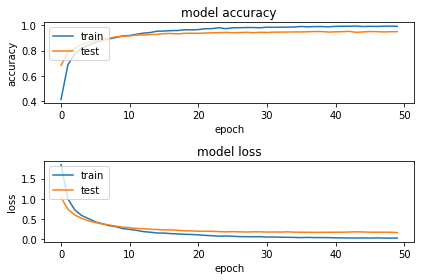

In [267]:
import matplotlib.pyplot as plt
plot_graph()

In [268]:
# show the accuracy on the testing set
print("evaluating...")
(loss1, accuracy1) = model1.evaluate(X_test, y_test, verbose=1)
print("accuracy: {:.2f}%".format(accuracy1 * 100))
print("loss: {:.2f}".format(loss1))

evaluating...
1359/1359 [==============================] - 0s 33us/step
accuracy: 95.00%
loss: 0.17


In [269]:
pred = model1.predict_classes(X_train)

In [270]:
actual = np.argmax(y_train, axis=1)

In [271]:
from sklearn.metrics import confusion_matrix

y_true = LABELS[actual]
y_pred = LABELS[pred]
classes=LABELS

cnf_matrix = confusion_matrix(y_true, y_pred, labels=classes)

In [272]:
# https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[449   0   0   0   0   0   0   0   0   0]
 [  0 458   0   0   0   0   0   0   0   0]
 [  0   0 440   0   0   0   0   0   0   0]
 [  0   0   0 447   0   0   0   0   0   0]
 [  0   0   0   0 437   0   0   0   0   0]
 [  0   0   0   0   0 169   0   0   0   0]
 [  0   0   0   0   0   0 484   0   0   0]
 [  0   0   0   0   0   0   0 451   0   0]
 [  0   1   0   0   0   0   0   0 516   0]
 [  0   0   0   0   0   0   0   0   0 224]]


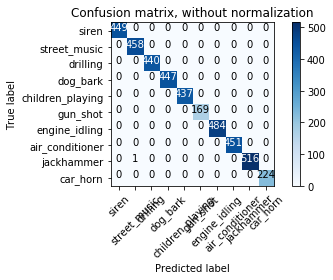

In [273]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

In [274]:
# make a prediction
ynew = model1.predict_classes(X_eval)
# show the inputs and predicted outputs
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

In [275]:
lab = LABELS[ynew]

In [276]:
file_id = np.load('file_id.npy')

In [277]:
df = pd.DataFrame(list(zip(lab,file_id)),columns=['Class','ID'])
df.ID = df.ID.astype('int64')
df = df.sort_values('ID')
df.to_csv(r'solution1.csv',index=None)

In [278]:
d1 = pd.read_csv('solution1.csv')
d2 = pd.read_csv('solution.csv')
(d1==d2).all()

Class    False
ID        True
dtype: bool

In [280]:
#model1.save_weights("model_1.h5")
model1.save('model_1.h5')